Name: Ashish Kumar Sant

Roll No: 102317018

Group: 3Q11

Assignment-2

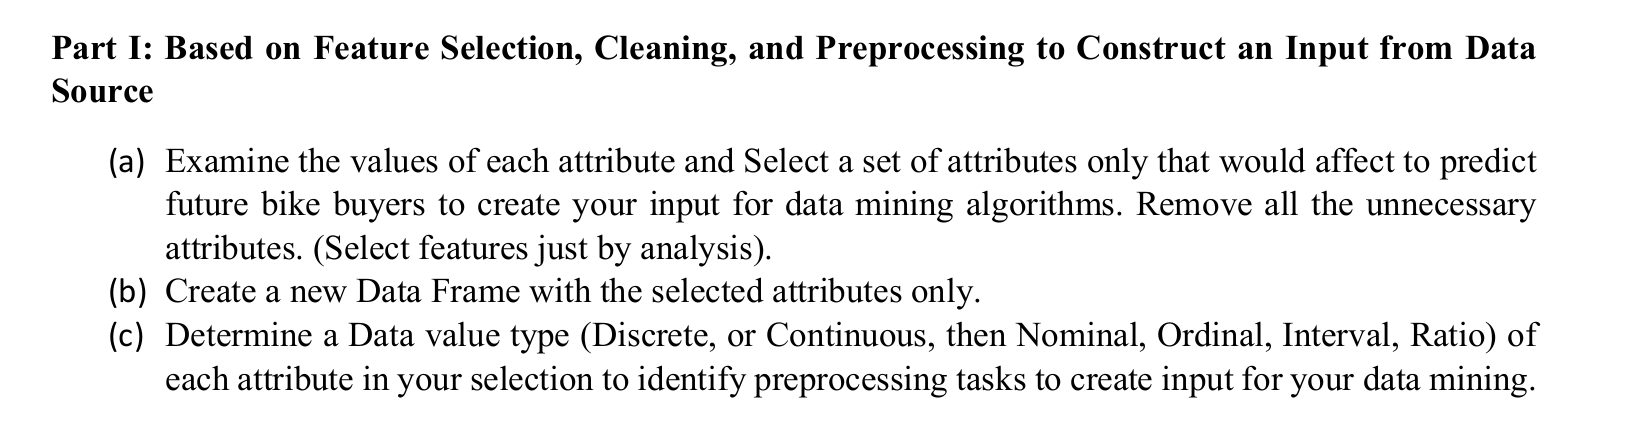

In [13]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MaxAbsScaler




In [15]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df=pd.read_csv('/kaggle/input/microsoft-adventure-works-cycles-customer-data/AWCustomers.csv')
sales=pd.read_csv('/kaggle/input/microsoft-adventure-works-cycles-customer-data/AWSales.csv')

/kaggle/input/microsoft-adventure-works-cycles-customer-data/AWCustomers.csv
/kaggle/input/microsoft-adventure-works-cycles-customer-data/AWTest-Classification.csv
/kaggle/input/microsoft-adventure-works-cycles-customer-data/AWSales.csv
/kaggle/input/microsoft-adventure-works-cycles-customer-data/AWTest-Regression.csv


In [16]:
merged_df=pd.merge(df,sales,on='CustomerID')
merged_df['BirthDate']=pd.to_datetime(merged_df['BirthDate'],errors='coerce') ## converts the birthdate to the format DD-MM-YYY HH:MM:SS
merged_df['Age']=datetime.now().year-merged_df['BirthDate'].dt.year ## Calculates age by extracting age from current date and year from birthdate and subtracting them both
new_columns=[
    'Gender',
    'MaritalStatus',
    'Age',
    'Education',
    'HomeOwnerFlag',
    'NumberCarsOwned',
    'NumberChildrenAtHome',
    'TotalChildren',
    'YearlyIncome',
    'BikeBuyer'
]
new_df=merged_df[new_columns]
print(new_df.head())

  Gender MaritalStatus  Age        Education  HomeOwnerFlag  NumberCarsOwned  \
0      M             M   38        Bachelors              1                3   
1      M             M   53  Partial College              1                2   
2      F             S   40        Bachelors              0                3   
3      M             M   48  Partial College              1                2   
4      M             S   50  Partial College              1                1   

   NumberChildrenAtHome  TotalChildren  YearlyIncome  BikeBuyer  
0                     0              1         81916          1  
1                     1              2         81076          1  
2                     0              0         86387          1  
3                     1              2         61481          1  
4                     0              0         51804          1  


In [ ]:
'''
Gender: Categorical

Age: Numerical  Ratio

Education: Categorical

Martial Status: Categorical , Nominal: Married or Unmarried

Home Owner Flag: Categorical , Nominal

Number of Cars Owned: Numerical , Discrete

Number of Children at Home: Discrete

Total Children: Discrete

Yearly Income : Ratio

Bike Buyer: Nominal(Binary)
'''

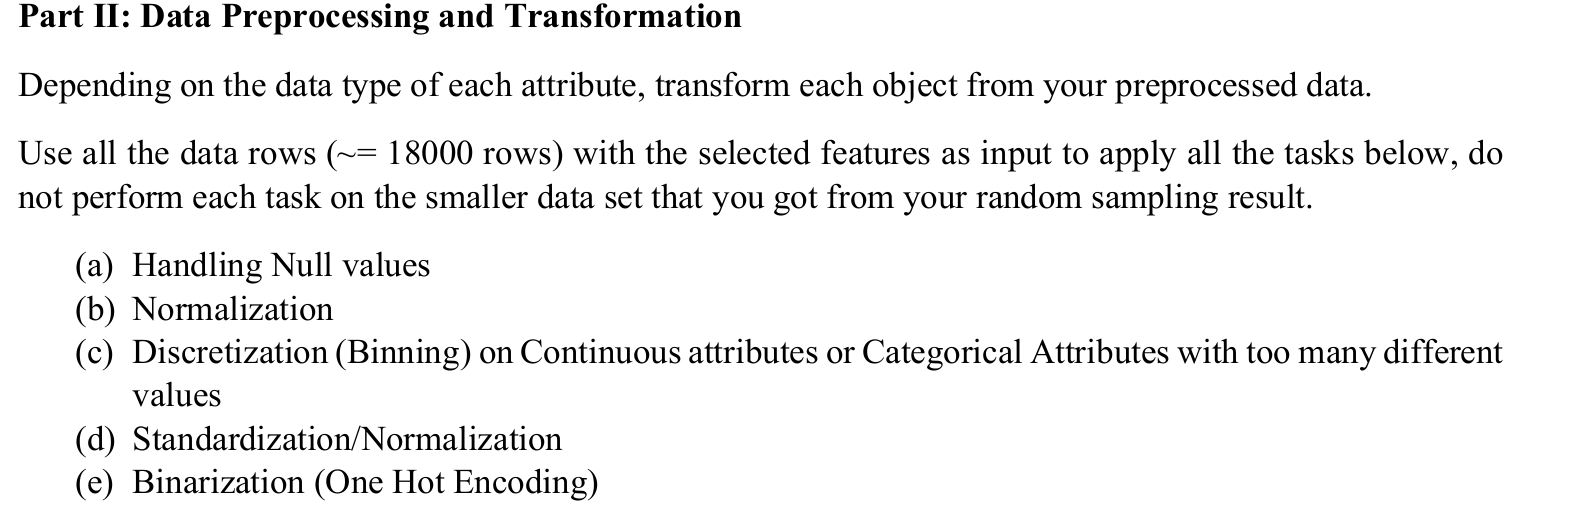

In [17]:
print(new_df.isnull().sum())
new_df=new_df.dropna()

# Normalisation
cols=['Age','YearlyIncome','TotalChildren']
scaler=MaxAbsScaler()
scaled=scaler.fit_transform(new_df[cols])
new_df[cols]=pd.DataFrame(scaled,columns=cols,index=new_df.index)

#Discretization
new_df['AgeGroup']=pd.cut(
    new_df['Age'],
    bins=[0,0.3,0.6,1],
    labels=['Young','Middle-Aged','Senior']
)


#Standardisation
from sklearn.preprocessing import StandardScaler
col=['NumberCarsOwned','NumberChildrenAtHome']
scaler2=StandardScaler()
new_df[col]=scaler2.fit_transform(new_df[col])

#Binarization
final_df=pd.get_dummies(new_df,columns=['Gender','MaritalStatus','Education','AgeGroup'])
print(final_df.head())

Gender                  0
MaritalStatus           0
Age                     0
Education               0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
BikeBuyer               0
dtype: int64
        Age  HomeOwnerFlag  NumberCarsOwned  NumberChildrenAtHome  \
0  0.400000              1         1.892524             -0.594371   
1  0.557895              1         0.798389              1.163279   
2  0.421053              0         1.892524             -0.594371   
3  0.505263              1         0.798389              1.163279   
4  0.526316              1        -0.295746             -0.594371   

   TotalChildren  YearlyIncome  BikeBuyer  Gender_F  Gender_M  \
0       0.333333      0.588837          1     False      True   
1       0.666667      0.582798          1     False      True   
2       0.000000      0.620975          1      True     False   
3       0.666667      0.441944          1     False 

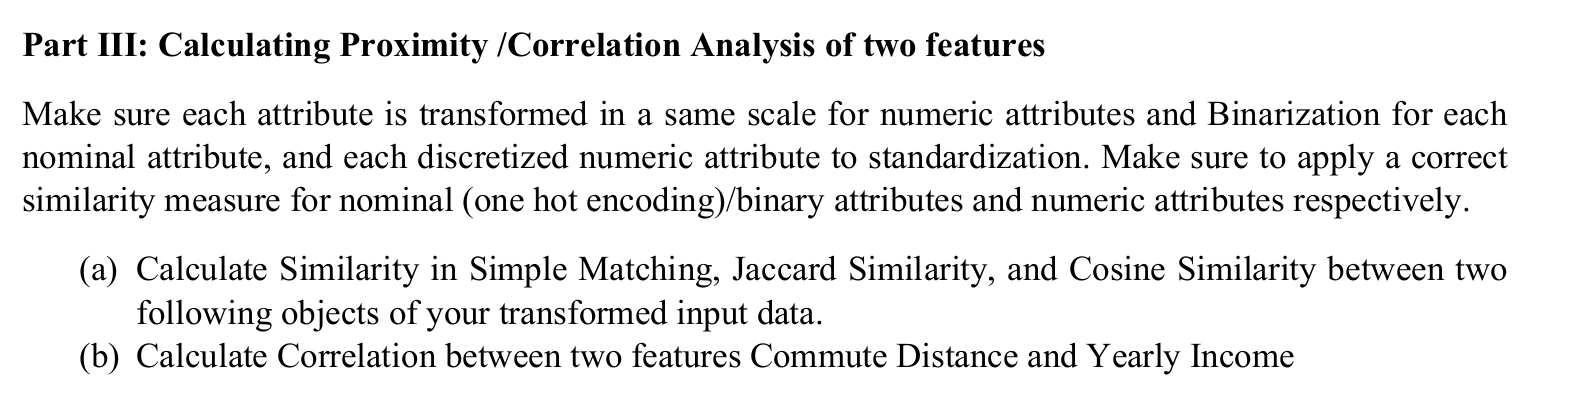

In [20]:

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
obj1=final_df.iloc[0]
obj2=final_df.iloc[1]
A=obj1.values
B=obj2.values

x=np.sum(A==B)
size=len(A)
smc=x/size
print("Smc")
print(smc)


y=np.sum((A==1) & (B==1))
denominator=np.sum((A==1) | (B==1))
jaccard=y/denominator
print("Jaccard similarity")
print(jaccard)


cosine=cosine_similarity([A],[B])
print("cosine similarity")
print(cosine)

Smc
0.631578947368421
Jaccard similarity
0.7142857142857143
cosine similarity
[[0.67485062]]
